---
layout: default
title: "Logistic Regression - Cost function"
categories: logisticRegression
permalink: /ML9/
order: 9
comments: true
---

In [34]:
%pylab --no-import-all inline
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

Populating the interactive namespace from numpy and matplotlib


# Cost Function in Logistic Regression
Given a training set of $m$ examples

$$
{(x^{1}, y^{1}),(x^{2}, y^{2}), \dots, (x^{m}, y^{m})}
$$

where $x$ is a vector $\mathbb{R}^{n+1}$ with $x_0=1$ and $y$ assumes discrete values $0,1$

$$
x \in
\begin{bmatrix}
x_0\\
x_1\\
\dots\\
x_n
\end{bmatrix}
$$

$$y \in \{0,1\}$$

and the hypothesis $h_\theta(x)$ is logistic

$$h_\theta(x)=\frac{1}{1+e^{-\theta^Tx}}$$

How do we chose (or how do we fit) the parameters $\theta$? For Linear regression we use the Cost function $J(\theta)$

$$J(\theta)=\frac{1}{m}\sum^m_{i=1}\frac{1}{2}\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)^2$$

But this function used is logistic regression is **non-convex**, it has many local minima and using gradient descent would lead to poor optimization (minimzation) and is not guaranteed to converge to the global minimum.

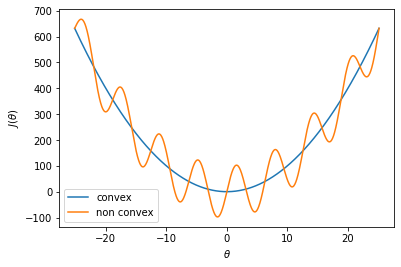

In [96]:
cycles = 8
p = np.linspace(-np.pi*cycles, np.pi*cycles, 1000)
fig, ax = plt.subplots()
ax.plot(p, p**2, label='convex')
ax.plot(p, np.sin(p)*100+p**2, label='non convex')
ax.set_xlabel('$\\theta$')
ax.set_ylabel('$J(\\theta)$')
ax.legend();

For simplcity in the next sections we will call the Cost function for a single example $\text{Cost}$

$$\frac{1}{2}\left(h_\theta\left(x^{(i)}\right)-y^{(i)}\right)^2 \equiv \text{Cost} \implies J(\theta)=\frac{1}{m}\sum_{i=1}^m\text{Cost}$$

## Cost function for a single training example
Here is the cost function that we will use for logistic regression

$$
\begin{equation*}
\text{Cost}=
\begin{cases}
-log(h_\theta(x)), & \text{if } y=1\\
-log(1-h_\theta(x)), & \text{if } y=0\\
\end{cases}
\end{equation*}
$$


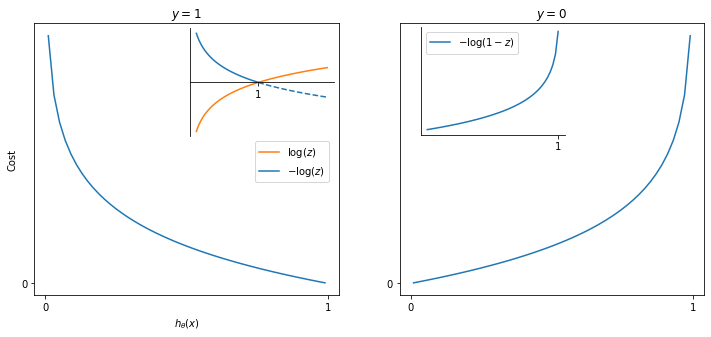

In [101]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(12,5))
hx=np.linspace(0.01,.99)
x1=np.linspace(0.1,1)
x2=np.linspace(1,2)
ax1.set_title('$y=1$')
ax1.plot(hx, -np.log(hx))
ax1.set_xlabel('$h_\\theta(x)$')
ax1.set_ylabel('Cost')
ax1.set_xticks([0,1])
ax1.set_yticks([0])

ax1i = inset_axes(ax1, width=2, height=1.5)
ax1i.set_xticks([0,1])
ax1i.set_yticks([])
ax1i.spines['bottom'].set_position('center')
ax1i.spines['right'].set_visible(False)
ax1i.spines['top'].set_visible(False)
ax1i.plot(np.r_[x1,x2], np.log(np.r_[x1,x2]), c='C1', label='$\log(z)$')
ax1i.plot(x1, -np.log(x1), label='$-\log(z)$')
ax1i.plot(x2, -np.log(x2), ls='--', c='C0')
ax1i.legend( bbox_to_anchor=(1, 0), loc='upper right')


ax2.set_title('$y=0$')
ax2.set_xticks([0,1])
ax2.set_yticks([0])
ax2.plot(hx, -np.log(1-hx))
ax2i = inset_axes(ax2, width=2, height=1.5, loc='upper left',
                  bbox_to_anchor=(1.3,1.3), bbox_transform=ax.transAxes)

ax2i.set_xticks([0,1])
ax2i.set_yticks([])
# ax1i.spines['bottom'].set_position('center')
ax2i.spines['right'].set_visible(False)
ax2i.spines['top'].set_visible(False)
ax2i.plot(x1, -np.log(1.01-x1), label='$-\log(1-z)$')
ax2i.legend();

This cost function has some desirable properties:

* For $y=1$
    * $h_\theta(x)\to1 \implies \text{Cost}\to0$. This is what we want because there should be an increasingly smaller cost when $h_\theta(x)\to y$ and no cost when $h_\theta(x) = y = 1$

    * $h_\theta(x) \to 0 \implies \text{Cost}\to\infty$. This captures the intuition that if $y=1$ and $P(y=1\mid x;\theta)$ the algorithm is penalized by a large cost
    
* For $y=0$
    * $h_\theta(x)\to1 \implies \text{Cost}\to\infty$. There is a big cost associated to predicting 1 when $y=0$
    * $h_\theta(x)\to0 \implies \text{Cost}\to0$. There is no cost associated to predicting 0 when $y=0$

## Simplified cost function
Since $y\in{0,1}$ we can write the $\text{Cost}$ function in a simpler way and compress the two cases in one equation.

$$
\text{Cost}(h_\theta(x),y)=-y\log(h_\theta(x))-(1-y)\log(1-h_\theta(x))
$$

When $y=1$:

$$
\begin{align}
\text{Cost}(h_\theta(x),y)&=-1\cdot\log(h_\theta(x))-0\cdot\log(1-h_\theta(x))\\
&=-\log(h_\theta(x))
\end{align}
$$

When $y=0$:

$$
\begin{align}
\text{Cost}(h_\theta(x),y)&=-0\cdot\log(h_\theta(x))-1\cdot\log(1-h_\theta(x))\\
&=-\log(1-h_\theta(x))
\end{align}
$$

## Cost function for the entire dataset
Now that we have a more compact way of writing the cost function we can write it for the whole dataset

$$
\begin{align}
J(\theta)&=\frac{1}{m}\sum_{i=1}^m\text{Cost}(h_\theta(x^{(i)}),y^{(i)})\\
&=-\frac{1}{m}\left[\sum_{i=1}^my^{(i)}\log\left(h_\theta(x^{(i)})\right)+\left(1-y^{(i)}\right)\log\left(1-h_\theta(x^{(i)})\right)\right]
\end{align}
$$

Although there are other cost functions that can be used this cost function can be derived from statistics using the principle of [maximum likelihood estimation.](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)

In order to estimate the parameters with this cost function we have to find the parameters $\theta$ that minimize $J(\theta)$

# Gradient descent
To minimize $J(\theta)$ we are going to use gradient descent

$$
\begin{equation*}
\theta_j := \theta_j-\alpha\frac{\partial}{\partial\theta_j}J(\theta)
\end{equation*}
\label{eq:gdescent} \tag{1}
$$

Where we repeat $\eqref{eq:gdescent}$ for all element $\theta_j$ of the parameters vector $\theta$ updating the parameters simoultanueously (after calculating them).

Deriving the term $\theta_j$ we have:

$$
\frac{\partial}{\partial\theta_j}=\frac{1}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}
$$

Plugging the derived term into the gradient descent we obtain

$$\theta_j := \theta_j-\frac{\alpha}{m}\sum_{i=1}^m\left(h_\theta(x^{(i)})-y^{(i)}\right)x_j^{(i)}$$

This looks identical to fradient descent for linear regression, however the definition of $h_\theta(x)$ is changed and is now $\frac{1}{1+e^{\theta^Tx}}$

# Vectorization
Vectorized implementations of the cost function and the gradient descent are

## Cost function

$$
\begin{align}
&h = g(X\theta)\\
&J(\theta)=\frac{1}{m}\left(-y^T\log(h)-(1-y)^T\log(1-h)\right)
\end{align}
$$

## Gradient descent

$$
\theta:=\theta-\frac{\alpha}{m}X^T\left(g(X\theta)-\vec{y}\right)
$$

# Advanced Optimization
By applying some concepts of optimization, we can fit logistic regression parameters much more efficiently than gradient descent and make the logistic regression algorithm scale better for large datasets.

Until now we have chosen to use the gradient descent optimization algorithm. However, there are other, more sophisticated optimization algorithms:

* [Conjugate descent](https://en.wikipedia.org/wiki/Conjugate_gradient_method)
* [BFGS](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)
* [L-BFGS](https://en.wikipedia.org/wiki/Limited-memory_BFGS)

These algorithms, at the cost of being more complex, share a series of advantages:

* They remove need of manually picking an $\alpha$
* They are often faster than gradient descent